<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_CNN_Demo_with_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1mXuT2pltpVOD5fxgS_CkUOPFEl9cNs0k?usp=sharing#scrollTo=rSwKi7LkXfhM

##Objective
To develop and train CNN with CIFAR10 dataset

Total Images: 60000 x 32 x 32 x 3 with 10 classes
Train Images: 50000
Test Images: 100000

In [2]:
#Import Libraries
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

In [3]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
print(x_train[150])

[[[ 66  37  25]
  [ 75  47  32]
  [ 84  56  39]
  ...
  [ 69  51  43]
  [104  87  73]
  [102  86  72]]

 [[ 72  62  50]
  [ 70  61  46]
  [116 107  90]
  ...
  [ 86  73  68]
  [153 141 130]
  [148 137 125]]

 [[ 86  85  75]
  [ 79  77  66]
  [145 144 130]
  ...
  [ 85  77  74]
  [156 150 141]
  [151 146 135]]

 ...

 [[123 131 118]
  [124 132 119]
  [130 138 125]
  ...
  [144 153 139]
  [151 162 148]
  [186 197 185]]

 [[134 142 129]
  [135 143 130]
  [140 148 135]
  ...
  [144 152 139]
  [169 178 164]
  [224 232 222]]

 [[130 138 125]
  [132 139 127]
  [137 145 132]
  ...
  [149 156 144]
  [186 193 180]
  [223 228 219]]]


In [5]:
print(y_train[150])

[3]


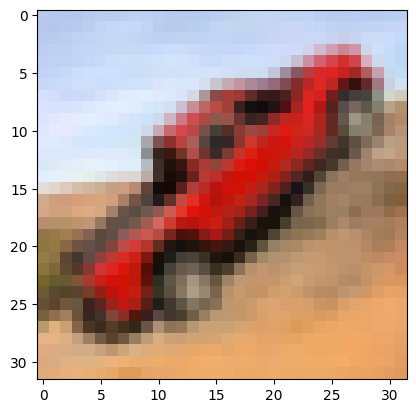

In [6]:
#Show Image
plt.imshow(x_train[140])
plt.show()

##Data Preparation

In [7]:
#Normalization
x_train = x_train/255
x_test = x_test/255

In [8]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [9]:
#Process Categorical Data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


##Model Building

In [11]:
#Base Model
model_1=Sequential()

model_1.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_1.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_1.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_1.add(LeakyReLU(alpha=0.1))

model_1.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_1.add(Flatten())

model_1.add(Dense(256))
model_1.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_1.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,546 (6.16 MB)

 Trainable params: 1,613,546 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Compile Model
model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005), metrics=['accuracy'])

In [15]:
#Train the Model
history_1=model_1.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 11s - 8ms/step - accuracy: 0.5146 - loss: 1.3726 - val_accuracy: 0.6094 - val_loss: 1.1356
Epoch 2/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6646 - loss: 0.9615 - val_accuracy: 0.6638 - val_loss: 0.9643
Epoch 3/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7410 - loss: 0.7392 - val_accuracy: 0.6782 - val_loss: 0.9421
Epoch 4/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8193 - loss: 0.5192 - val_accuracy: 0.6944 - val_loss: 0.9759
Epoch 5/10
1407/1407 - 5s - 4ms/step - accuracy: 0.8913 - loss: 0.3191 - val_accuracy: 0.6968 - val_loss: 1.1205
Epoch 6/10
1407/1407 - 5s - 3ms/step - accuracy: 0.9449 - loss: 0.1681 - val_accuracy: 0.6878 - val_loss: 1.3757
Epoch 7/10
1407/1407 - 5s - 4ms/step - accuracy: 0.9710 - loss: 0.0894 - val_accuracy: 0.6962 - val_loss: 1.5927
Epoch 8/10
1407/1407 - 5s - 4ms/step - accuracy: 0.9835 - loss: 0.0507 - val_accuracy: 0.6860 - val_loss: 1.8334
Epoch 9/10
1407/1407 - 10s - 7ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.6950 

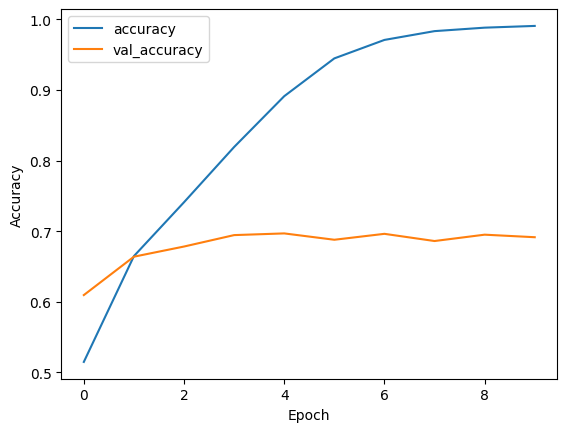

In [16]:
#EValuate Model Accuracy
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

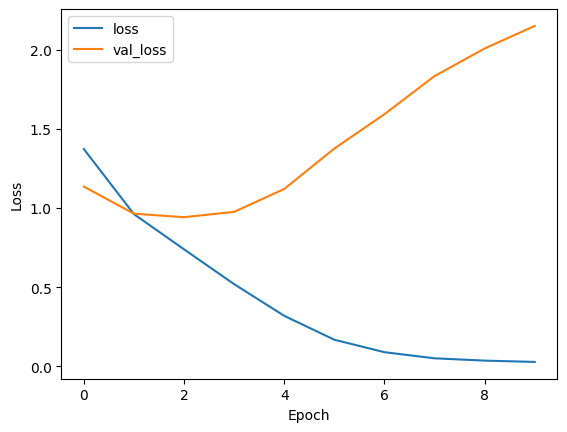

In [17]:
#Evaluate Model Loss
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Model_2: Adding Max pool after each convolutional layer
model_2 = Sequential()

model_2.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(32,32,3))) #First CNN Layer
model_2.add(LeakyReLU(alpha=0.1)) #Small slope alpha=0.1

model_2.add(MaxPooling2D(pool_size=(2,2))) #Pooling Layer

model_2.add(Conv2D(filters=32, kernel_size=(3,3))) #Second CNN Layer
model_2.add(LeakyReLU(alpha=0.1))

model_2.add(MaxPooling2D(pool_size=(2,2))) #Pooling Layer

model_2.add(Flatten())

model_2.add(Dense(256))
model_2.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_2.add(Dense(10, activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [19]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,826 (1.16 MB)

 Trainable params: 302,826 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Compile Model
model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005), metrics=['accuracy'])

In [21]:
#Train the Model 2
history_2=model_2.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 9s - 6ms/step - accuracy: 0.4895 - loss: 1.4194 - val_accuracy: 0.5742 - val_loss: 1.1951
Epoch 2/10
1407/1407 - 4s - 3ms/step - accuracy: 0.6216 - loss: 1.0721 - val_accuracy: 0.6536 - val_loss: 1.0053
Epoch 3/10
1407/1407 - 6s - 4ms/step - accuracy: 0.6817 - loss: 0.9105 - val_accuracy: 0.6832 - val_loss: 0.9321
Epoch 4/10
1407/1407 - 4s - 3ms/step - accuracy: 0.7268 - loss: 0.7843 - val_accuracy: 0.6694 - val_loss: 0.9651
Epoch 5/10
1407/1407 - 4s - 3ms/step - accuracy: 0.7649 - loss: 0.6765 - val_accuracy: 0.6988 - val_loss: 0.9176
Epoch 6/10
1407/1407 - 6s - 4ms/step - accuracy: 0.8014 - loss: 0.5674 - val_accuracy: 0.6990 - val_loss: 0.9347
Epoch 7/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8338 - loss: 0.4733 - val_accuracy: 0.7136 - val_loss: 0.9513
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.8686 - loss: 0.3828 - val_accuracy: 0.6952 - val_loss: 1.0753
Epoch 9/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8942 - loss: 0.3041 - val_accuracy: 0.7002 - 

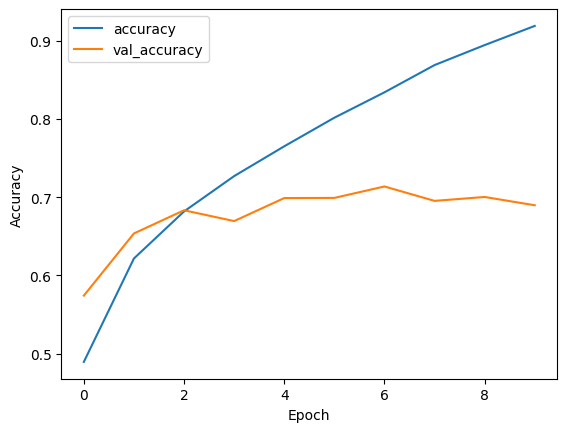

In [22]:
#Evaluate Model_2 Optimized Model
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
#Model_3 Adding dropout layers in CNN
model_3=Sequential()

model_3.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_3.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_3.add(Dropout(0.2))  #First dropout

model_3.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_3.add(LeakyReLU(alpha=0.1))

model_3.add(Dropout(0.2)) #second dropout

model_3.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_3.add(Flatten())

model_3.add(Dense(256))
model_3.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_3.add(Dropout(0.5)) #Third dropout

model_3.add(Dense(10,activation='softmax')) #Output layer

In [26]:
#Compile Model
model_3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [27]:
#Train the Model 3
history_1=model_3.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 14s - 10ms/step - accuracy: 0.4519 - loss: 1.5200 - val_accuracy: 0.4768 - val_loss: 1.5772
Epoch 2/10
1407/1407 - 5s - 3ms/step - accuracy: 0.5952 - loss: 1.1426 - val_accuracy: 0.4782 - val_loss: 1.8284
Epoch 3/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6469 - loss: 0.9988 - val_accuracy: 0.5790 - val_loss: 1.3988
Epoch 4/10
1407/1407 - 6s - 4ms/step - accuracy: 0.6842 - loss: 0.9020 - val_accuracy: 0.6034 - val_loss: 1.2785
Epoch 5/10
1407/1407 - 6s - 4ms/step - accuracy: 0.7054 - loss: 0.8324 - val_accuracy: 0.6448 - val_loss: 1.0867
Epoch 6/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7305 - loss: 0.7667 - val_accuracy: 0.6534 - val_loss: 1.0463
Epoch 7/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7467 - loss: 0.7150 - val_accuracy: 0.6542 - val_loss: 1.0839
Epoch 8/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7607 - loss: 0.6747 - val_accuracy: 0.6394 - val_loss: 1.1807
Epoch 9/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7739 - loss: 0.6366 - val_accuracy: 0.6468 

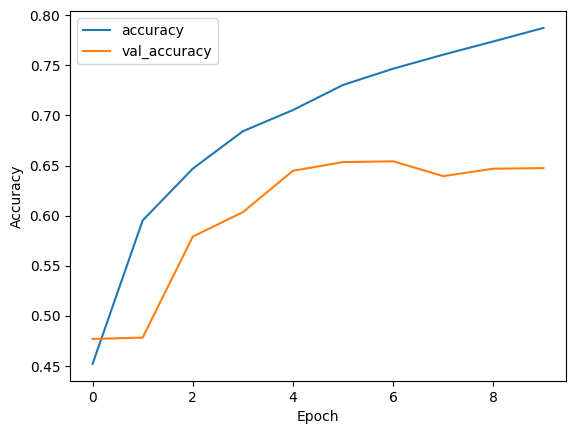

In [28]:
#Evaluate Model_3 After adding dropout layers
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#Model_4 Adding mode Convolutional layers layers in CNN
model_4=Sequential()

model_4.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_4.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_4.add(Dropout(0.2))  #First dropout

model_4.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_4.add(LeakyReLU(alpha=0.1))

model_4.add(Dropout(0.2)) #second Dropout

model_4.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer


#another set of Conv layers

model_4.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_4.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_4.add(Dropout(0.2))  #First dropout

model_4.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_4.add(LeakyReLU(alpha=0.1))

model_4.add(Dropout(0.2)) #second Dropout

model_4.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_4.add(Flatten())

model_4.add(Dense(256))
model_4.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_4.add(Dropout(0.5)) #third dropout

model_4.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [30]:
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,978 (867.10 KB)

 Trainable params: 221,978 (867.10 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_4.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [32]:
history_2=model_4.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 18s - 13ms/step - accuracy: 0.4114 - loss: 1.6105 - val_accuracy: 0.4856 - val_loss: 1.4213
Epoch 2/10
1407/1407 - 10s - 7ms/step - accuracy: 0.5474 - loss: 1.2719 - val_accuracy: 0.5854 - val_loss: 1.1488
Epoch 3/10
1407/1407 - 5s - 4ms/step - accuracy: 0.5982 - loss: 1.1304 - val_accuracy: 0.5992 - val_loss: 1.1619
Epoch 4/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6292 - loss: 1.0487 - val_accuracy: 0.6084 - val_loss: 1.1706
Epoch 5/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6505 - loss: 0.9896 - val_accuracy: 0.6732 - val_loss: 0.9338
Epoch 6/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6665 - loss: 0.9427 - val_accuracy: 0.6908 - val_loss: 0.9067
Epoch 7/10
1407/1407 - 6s - 4ms/step - accuracy: 0.6799 - loss: 0.9157 - val_accuracy: 0.6778 - val_loss: 0.9419
Epoch 8/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6852 - loss: 0.8881 - val_accuracy: 0.7018 - val_loss: 0.8404
Epoch 9/10
1407/1407 - 6s - 4ms/step - accuracy: 0.6979 - loss: 0.8587 - val_accuracy: 0.6872

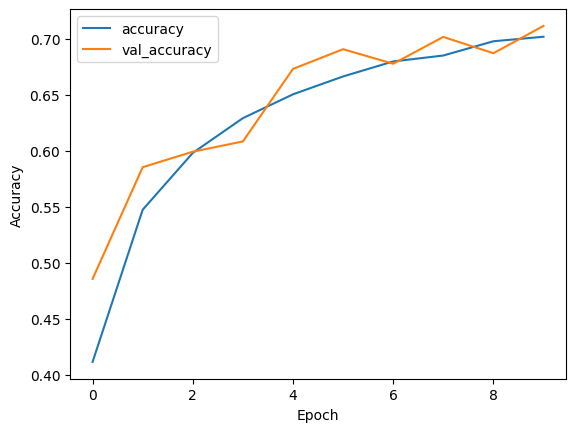

In [33]:
#Evaluate Model_4 After adding more Conv layers
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#Make some Predictions
y_pred=model_4.predict(x_test)

y_pred_index=np.argmax(y_pred,axis=1)
print(y_pred_index)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[3 8 8 ... 5 0 7]


[[604  11 101  53  32   9  15  19 127  29]
 [ 11 814   8  37  10   9  13   6  26  66]
 [ 37   1 643  84  92  60  46  23  13   1]
 [  4   2  89 514  74 229  52  21  10   5]
 [  2   1 102  63 728  42  16  36  10   0]
 [  1   0  74 188  60 639   8  26   4   0]
 [  1   1  81  82  92  31 705   3   3   1]
 [  5   0  44  60  80 103   5 698   3   2]
 [ 37  31  14  32  14   6  17   4 818  27]
 [ 24  58   4  48  17  12   8  28  33 768]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1000
           1       0.89      0.81      0.85      1000
           2       0.55      0.64      0.60      1000
           3       0.44      0.51      0.48      1000
           4       0.61      0.73      0.66      1000
           5       0.56      0.64      0.60      1000
           6       0.80      0.70      0.75      1000
           7       0.81      0.70      0.75      1000
           8       0.78      0.82      0.80      1000
           9       0.85     

Text(95.72222222222221, 0.5, 'Truth')

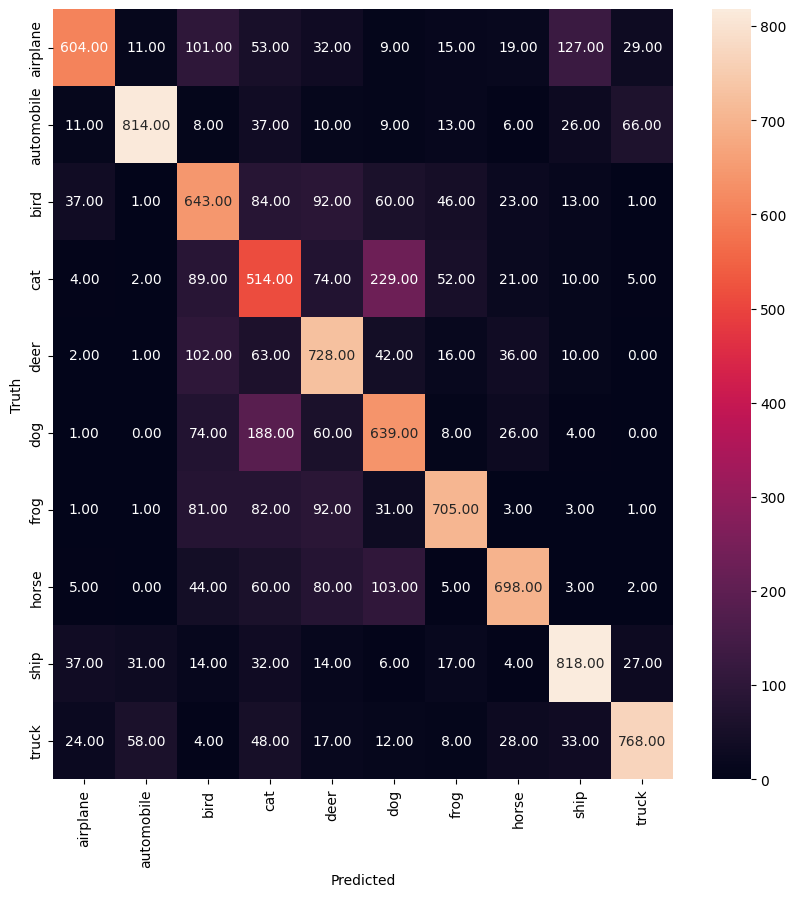

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(np.argmax(y_test, axis=1),y_pred_index)
print(cm)
print(classification_report(np.argmax(y_test, axis=1),y_pred_index))

plt.figure(figsize=(10,10))
import seaborn as sns
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=cifar_classes,yticklabels=cifar_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Truth')